In [1]:
import matplotlib.pyplot as plt
import model.util as util
import seaborn as sns
import pandas as pd

In [2]:
data = util.get_data('WOP', os.path.join('.', 'data'))
data.sample(frac=1, random_state=42).head(10)

,i_hnf,i_cac,i_frc,i_hrt,i_ren,i_res,i_grp,0.05,0.1,0.25,0.5,0.75,0.9,0.95,i_key
803,-12,7,5,90,10,100,0,0.0,0.0,0.0,132.0,251.0,412.0,530.0,1
124,-31,7,5,90,7,100,0,380.0,392.0,414.0,442.0,482.0,531.0,565.0,0
350,-118,7,5,90,12,100,0,345.0,368.0,405.0,449.0,498.0,551.0,575.0,0
682,19,7,5,90,6,100,0,0.0,0.0,75.0,156.0,257.0,393.0,499.0,1
1326,-12,7,5,90,0,100,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
976,82,7,5,90,1,100,0,0.0,0.0,0.0,71.0,263.0,381.5,431.0,1
1493,32,7,5,90,11,100,0,0.0,0.0,0.0,221.0,329.5,399.5,438.0,2
706,69,7,5,90,4,100,0,0.0,0.0,62.0,148.0,251.0,391.0,495.0,1
613,-106,7,5,90,2,100,0,0.0,23.0,110.0,188.5,289.0,416.0,489.5,1
1587,-24,7,5,90,1,100,0,0.0,0.0,0.0,65.0,178.0,259.5,298.0,2


In [3]:
columns = [col for col in data.columns if '0.' not in col]
columns.pop()

display(pd.DataFrame({
    'column'            : list(columns),
    'unique values'     : [len(data[col].unique()) for col in columns],
    'total values'      : [len(data[col]) for col in columns],
    'unique / total'    : [len(data[col].unique()) / len(data[col]) for col in columns]
}))

,column,unique values,total values,unique / total
0,i_hnf,41,1599,0.025641
1,i_cac,1,1599,0.000625
2,i_frc,1,1599,0.000625
3,i_hrt,1,1599,0.000625
4,i_ren,13,1599,0.008130
5,i_res,1,1599,0.000625
6,i_grp,1,1599,0.000625


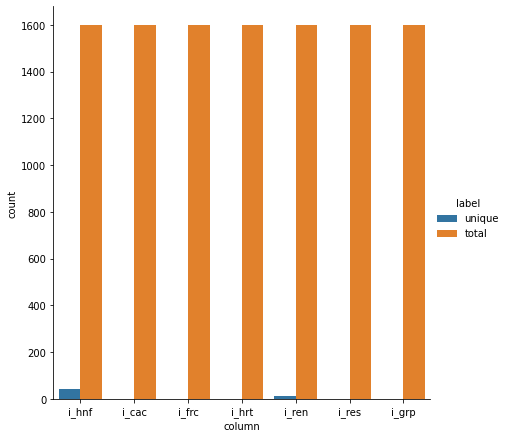

In [4]:
sns.catplot(hue='label'
    , x='column'
    , y='count'
    , kind='bar'
    , data=pd.DataFrame({
        'column': list(columns) + list(columns),
        'label' : (['unique'] * len(columns)) + (['total'] * len(columns)),
        'count' : [len(data[col].unique()) for col in columns] + [len(data[col]) for col in columns]
    })
    , height=6
);

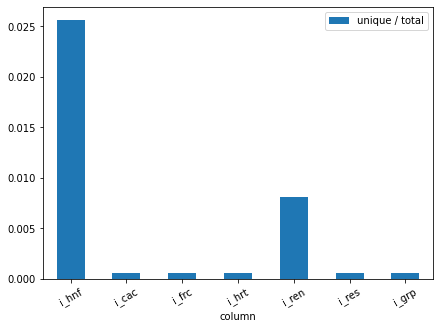

In [5]:
pd.DataFrame({
    'column'            : list(columns),
    'unique / total'    : [len(data[col].unique()) / len(data[col]) for col in columns]
}).plot(kind='bar', x='column', rot=30, figsize=(7, 5));